In [4]:
import pandas as pd

In [2]:
# loading clean data for analysis

In [3]:
# creating new column Percentage from all available three sciores and creating grade from avg scores

In [6]:
df = pd.read_csv('/Users/Likhita/OneDrive/Documents/PDS/StudentsPerformance.csv')

print(df.to_string())

     gender race/ethnicity parental level of education         lunch test preparation course  math score  reading score  writing score
0    female        group B           bachelor's degree      standard                    none          72             72             74
1    female        group C                some college      standard               completed          69             90             88
2    female        group B             master's degree      standard                    none          90             95             93
3      male        group A          associate's degree  free/reduced                    none          47             57             44
4      male        group C                some college      standard                    none          76             78             75
5    female        group B          associate's degree      standard                    none          71             83             78
6    female        group B                some college 

In [12]:
df['Percentage'] = df.apply(lambda row: (row['math score'] + row['reading score'] + row['writing score']) / 3, axis=1)
print(df['Percentage'])


0      72.666667
1      82.333333
2      92.666667
3      49.333333
4      76.333333
         ...    
995    94.000000
996    57.333333
997    65.000000
998    74.333333
999    83.000000
Name: Percentage, Length: 1000, dtype: float64


In [50]:

# Define the grading function
def Grade(percentage):
    if percentage >= 95:
        return 'O'
    elif percentage >= 81:
        return 'A'
    elif percentage >= 71:
        return 'B'
    elif percentage >= 61:
        return 'C'
    elif percentage >= 51:
        return 'D'
    elif percentage >= 41:
        return 'E'
    else:
        return 'F'

# Apply the grading function to the dataframe
df['Grade'] = df['Percentage'].apply(Grade)


In [18]:
print(df)

     gender race/ethnicity parental level of education         lunch  \
0    female        group B           bachelor's degree      standard   
1    female        group C                some college      standard   
2    female        group B             master's degree      standard   
3      male        group A          associate's degree  free/reduced   
4      male        group C                some college      standard   
..      ...            ...                         ...           ...   
995  female        group E             master's degree      standard   
996    male        group C                 high school  free/reduced   
997  female        group C                 high school  free/reduced   
998  female        group D                some college      standard   
999  female        group D                some college  free/reduced   

    test preparation course  math score  reading score  writing score  \
0                      none          72             72        

In [15]:
# using Seaborn for analysis

In [24]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

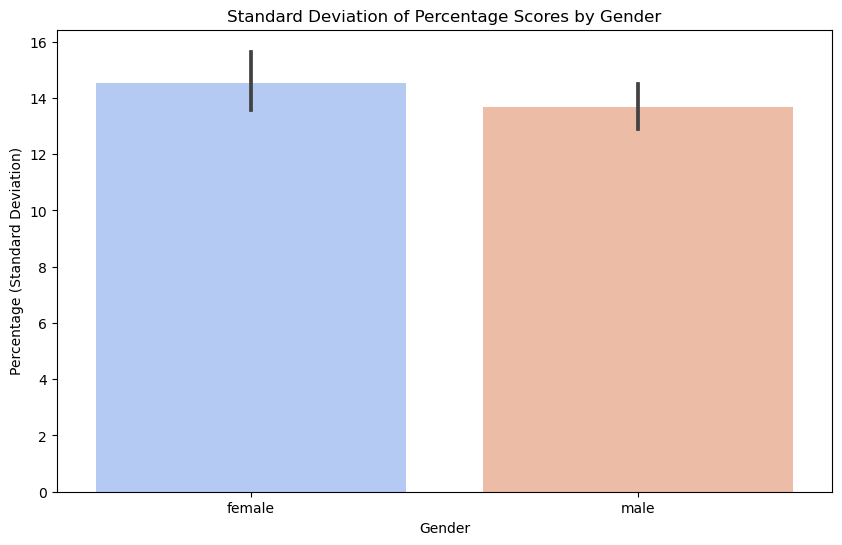

In [34]:

# Create a bar plot of gender vs. percentage with standard deviation as the estimator
plt.figure(figsize=(10, 6))
sns.barplot(x='gender', y='Percentage', data=df, palette='coolwarm', estimator=np.std)

# Add labels and title
plt.xlabel('Gender')
plt.ylabel('Percentage (Standard Deviation)')
plt.title('Standard Deviation of Percentage Scores by Gender')

# Show plot
plt.show()


In [36]:
df['gender'].value_counts()

gender
female    518
male      482
Name: count, dtype: int64

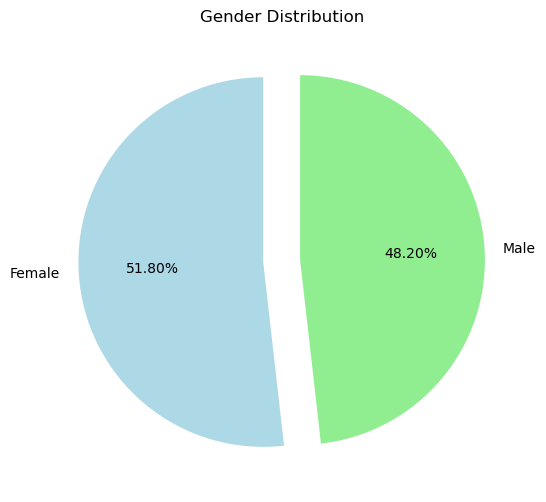

In [44]:

# Count the occurrences of each gender
gender_counts = df['gender'].value_counts()

# Define labels and colors
labels = ['Female', 'Male']
colors = ['lightblue', 'lightgreen']
explode = [0.1, 0.1]

# Create the pie chart
plt.figure(figsize=(6, 6))
plt.pie(gender_counts, labels=labels, explode=explode, autopct='%1.2f%%', colors=colors, startangle=90)

# Add a title
plt.title('Gender Distribution')

# Show the plot
plt.show()


In [29]:
# Below countplot illustares the grade secured by female and male 

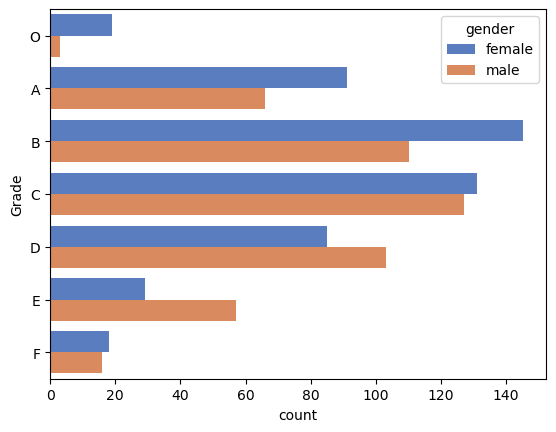

In [68]:
# Create the count plot
ax = sns.countplot(y="Grade", hue="gender", data=df, order=["O", "A", "B", "C", "D", "E", "F"], palette='muted')

# Save the plot to a file
plt.savefig("C:/Users/Likhita/OneDrive/Documents/Grade_Analysis_gender.png")

# Optionally, show the plot
plt.show()


In [33]:
# Below countplot illustrates the grades secured by students grouped by ethinicity

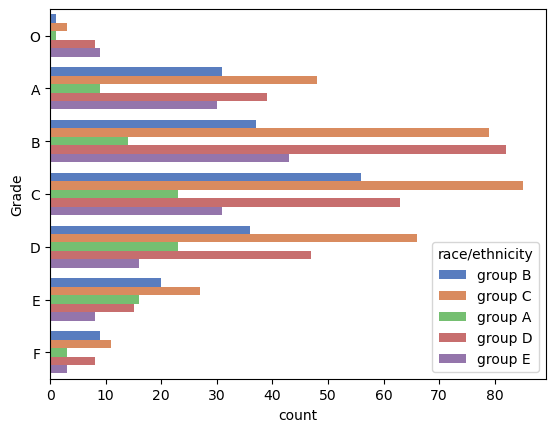

In [84]:
ax = sns.countplot(y="Grade", hue="race/ethnicity", data=df, order=["O","A","B","C","D","E","F"],palette = 'muted')
fig=ax.get_figure()
fig.savefig("C:/Users/Likhita/OneDrive/Documents/Grade_Analysis_race.png")

In [ ]:
# below countplot illustates the gardes secured by stuidents and their parenta; level of

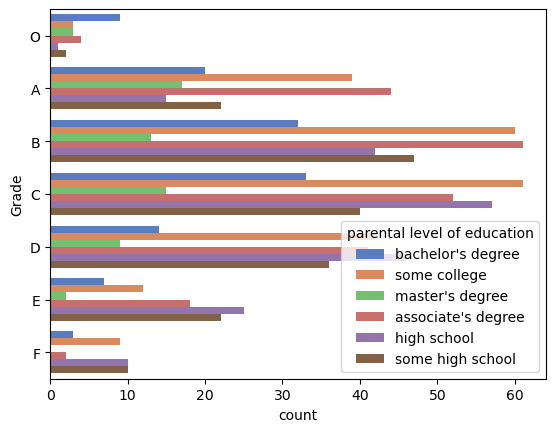

In [108]:
ax = sns.countplot(y="Grade", hue="parental level of education", data=df, order=["O","A","B","C","D","E","F"], palette = 'muted')
fig=ax.get_figure()
fig.savefig("C:/Users/Likhita/OneDrive/Documents/Grade_Analysis_Parental_education.png")

In [42]:
# below countplot illustrates the grade secured by students grouped by their lunch. It shows how lunch
#effects teh student poerformance.

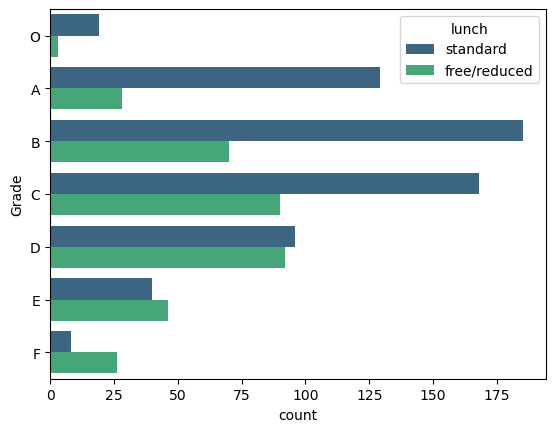

In [120]:
sns.countplot(y="Grade", hue="lunch", data=df, order=["O", "A", "B", "C", "D", "E", "F"], palette='viridis')
plt.savefig("C:/Users/Likhita/OneDrive/Documents/Grade_Analysis_lunch.png")
plt.show()


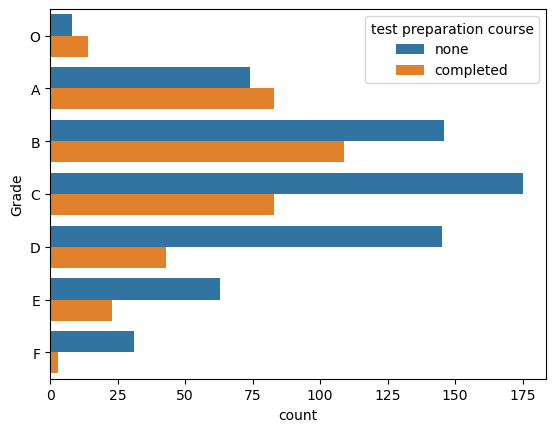

In [124]:
ax = sns.countplot(y="Grade", hue="test preparation course", data=df, order=["O","A","B","C","D","E","F"])
fig=ax.get_figure()
fig.savefig("C:/Users/Likhita/OneDrive/Documents/Grade_Analysis_test_prepartion.png")

C:\Users\Likhita\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


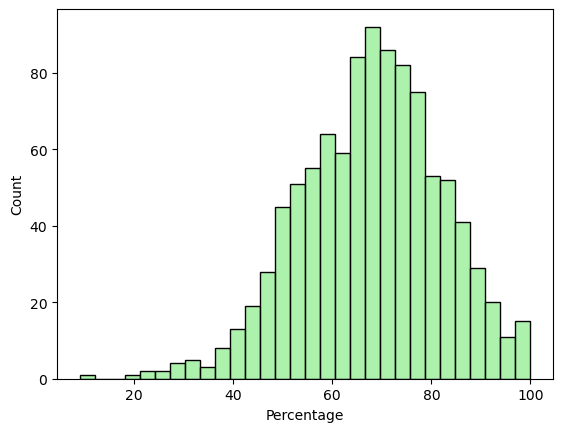

In [134]:
ax = sns.histplot(df['Percentage'], kde=False, color='lightgreen', bins=30)
plt.savefig("C:/Users/Likhita/OneDrive/Documents/Distribution_percentage.png")
plt.show()


C:\Users\Likhita\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Likhita\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


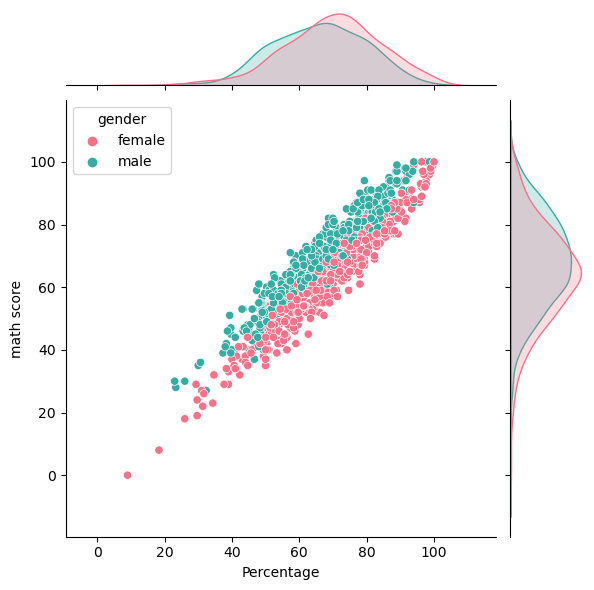

In [142]:
ax = sns.jointplot(x='Percentage', y='math score', hue='gender', data=df, palette='husl')
plt.savefig("C:/Users/Likhita/OneDrive/Documents/Jointplot_Percentage_MathScore.png")
plt.show()


C:\Users\Likhita\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Likhita\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


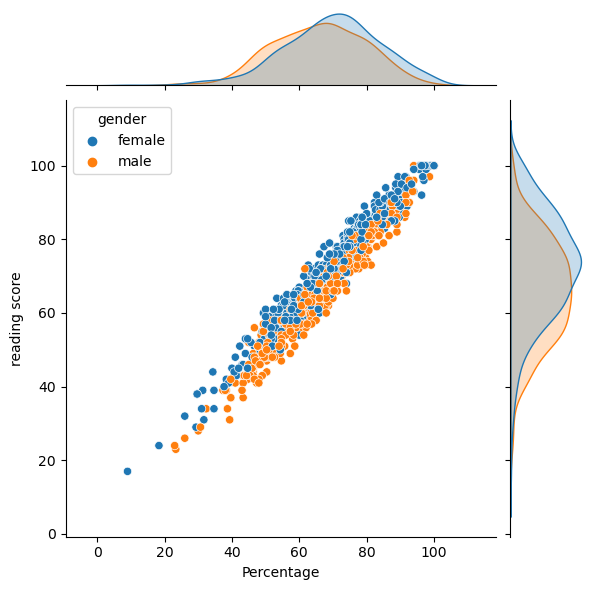

In [62]:
ax=sns.jointplot(x ='Percentage', y ='reading score',hue="gender", data = df)

C:\Users\Likhita\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Likhita\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


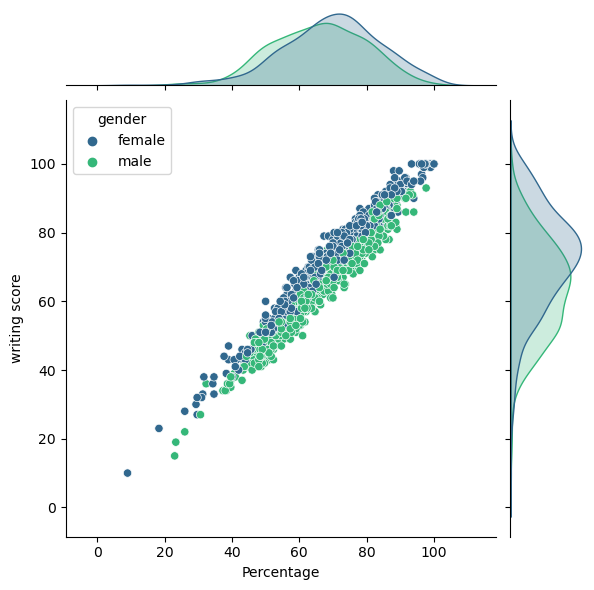

In [144]:

ax = sns.jointplot(x='Percentage', y='writing score', hue='gender', data=df, palette='viridis')
plt.savefig("C:/Users/Likhita/OneDrive/Documents/Jointplot_Percentage_WritingScore.png")
plt.show()
